# Used Car Price Prediction

### Load Dataset

In [2]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sn

In [3]:
cars_df = pd.read_csv( "new_used_car_v1.csv" )

In [4]:
cars_df.sample(5)

,index,Name,Location,Year,Kilometers_Driven,Fuel_Type,Transmission,Owner_Type,Mileage,Engine,Power,Seats,New_Price,Price,age,KM_Driven,make,mileage_new,engine_new,power_new
988,1937,Maruti Alto LXi,Chennai,2008,65000,Petrol,Manual,First,19.7 kmpl,796 CC,46.3 bhp,5.0,NaN,1.59,11,65,maruti,19.70,796.0,46.30
1251,2503,Maruti Ertiga VDI,Kolkata,2014,47052,Diesel,Manual,First,20.77 kmpl,1248 CC,88.76 bhp,7.0,NaN,5.99,5,47,maruti,20.77,1248.0,88.76
2184,4253,Honda Amaze S Petrol,Kolkata,2013,32576,Petrol,Manual,First,19.5 kmpl,1199 CC,88.76 bhp,5.0,7.36 Lakh,3.15,6,32,honda,19.50,1199.0,88.76
369,776,Hyundai i10 Sportz AT,Coimbatore,2014,41016,Petrol,Automatic,Second,16.95 kmpl,1197 CC,78.9 bhp,5.0,NaN,5.08,5,41,hyundai,16.95,1197.0,78.90
2291,4460,Tata Indica V2 DLS BSIII,Pune,2013,70000,Diesel,Manual,First,17.88 kmpl,1405 CC,48.21 bhp,5.0,NaN,1.80,6,70,tata,17.88,1405.0,48.21


In [5]:
cars_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3092 entries, 0 to 3091
Data columns (total 20 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   index              3092 non-null   int64  
 1   Name               3092 non-null   object 
 2   Location           3092 non-null   object 
 3   Year               3092 non-null   int64  
 4   Kilometers_Driven  3092 non-null   int64  
 5   Fuel_Type          3092 non-null   object 
 6   Transmission       3092 non-null   object 
 7   Owner_Type         3092 non-null   object 
 8   Mileage            3092 non-null   object 
 9   Engine             3092 non-null   object 
 10  Power              3092 non-null   object 
 11  Seats              3091 non-null   float64
 12  New_Price          411 non-null    object 
 13  Price              3092 non-null   float64
 14  age                3092 non-null   int64  
 15  KM_Driven          3092 non-null   int64  
 16  make               3092 

### Feature Set Selection

In [6]:
cars_df.columns

Index(['index', 'Name', 'Location', 'Year', 'Kilometers_Driven', 'Fuel_Type',
       'Transmission', 'Owner_Type', 'Mileage', 'Engine', 'Power', 'Seats',
       'New_Price', 'Price', 'age', 'KM_Driven', 'make', 'mileage_new',
       'engine_new', 'power_new'],
      dtype='object')

In [7]:
x_features = ['KM_Driven', 'Fuel_Type', 'age',
              'Transmission', 'Owner_Type', 'Seats', 
              'make', 'mileage_new', 'engine_new', 
              'power_new', 'Location']

In [8]:
cat_features = ['Fuel_Type', 
                'Transmission', 'Owner_Type',
                'make', 'Location']

In [9]:
num_features = list(set(x_features) - set(cat_features))

In [10]:
num_features

['power_new', 'Seats', 'KM_Driven', 'mileage_new', 'engine_new', 'age']

In [11]:
cars_df[x_features].info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3092 entries, 0 to 3091
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   KM_Driven     3092 non-null   int64  
 1   Fuel_Type     3092 non-null   object 
 2   age           3092 non-null   int64  
 3   Transmission  3092 non-null   object 
 4   Owner_Type    3092 non-null   object 
 5   Seats         3091 non-null   float64
 6   make          3092 non-null   object 
 7   mileage_new   3092 non-null   float64
 8   engine_new    3092 non-null   float64
 9   power_new     3092 non-null   float64
 10  Location      3092 non-null   object 
dtypes: float64(4), int64(2), object(5)
memory usage: 265.8+ KB


### Dropping Null Values

In [12]:
cars_df = cars_df[x_features + ['Price']].dropna()

In [13]:
cars_df.shape

(3091, 12)

In [14]:
cars_df.sample(5)

,KM_Driven,Fuel_Type,age,Transmission,Owner_Type,Seats,make,mileage_new,engine_new,power_new,Location,Price
2665,7,Petrol,3,Automatic,First,5.0,maruti,23.1,998.0,67.04,Mumbai,4.35
2282,4,Petrol,1,Manual,First,5.0,hyundai,18.9,1197.0,81.86,Kolkata,4.80
2643,45,Diesel,5,Manual,First,5.0,ford,22.7,1498.0,89.84,Hyderabad,7.50
2124,20,Petrol,4,Manual,First,5.0,hyundai,21.1,814.0,55.20,Ahmedabad,2.66
673,31,Petrol,3,Manual,First,5.0,maruti,24.7,796.0,47.30,Kolkata,2.15


### Setting X and y variables

In [15]:
X = cars_df[x_features]
y = cars_df['Price']

In [19]:
!pip3 install sklearn 

  Using cached sklearn-0.0.tar.gz (1.1 kB)
     |████████████████████████████████| 7.3 MB 434 kB/s eta 0:00:01
     |████████████████████████████████| 303 kB 1.9 MB/s eta 0:00:01
  Created wheel for sklearn: filename=sklearn-0.0-py2.py3-none-any.whl size=1309 sha256=d309904a48b21d9f9fec1e511d0d1c48895d47f0eea1702b3c73e34de9510ecf
  Stored in directory: /Users/dks/Library/Caches/pip/wheels/e4/7b/98/b6466d71b8d738a0c547008b9eb39bf8676d1ff6ca4b22af1c
Successfully built sklearn
You should consider upgrading via the '/usr/local/opt/python@3.9/bin/python3.9 -m pip install --upgrade pip' command.


### Data Splitting

In [20]:
from sklearn.model_selection import train_test_split

In [21]:
X_train, X_test, y_train, y_test = train_test_split(X,
                                                    y,
                                                    train_size = 0.8,
                                                    random_state = 80)

In [22]:
X_train

,KM_Driven,Fuel_Type,age,Transmission,Owner_Type,Seats,make,mileage_new,engine_new,power_new,Location
1458,81,Diesel,5,Manual,First,5.0,volkswagen,20.14,1498.0,88.80,Hyderabad
3079,70,Petrol,9,Manual,Second,5.0,volkswagen,17.24,1198.0,73.90,Pune
2276,75,Petrol,4,Manual,First,5.0,hyundai,20.36,1197.0,78.90,Mumbai
1599,95,Petrol,21,Manual,Third,5.0,maruti,17.30,993.0,60.00,Jaipur
2356,14,Petrol,2,Manual,First,5.0,hyundai,18.60,1197.0,81.83,Kochi
...,...,...,...,...,...,...,...,...,...,...,...
522,45,Diesel,5,Manual,First,5.0,maruti,23.40,1248.0,74.00,Kolkata
2260,16,Petrol,2,Manual,First,5.0,tata,23.84,1199.0,84.00,Hyderabad
2983,21,Petrol,4,Manual,First,5.0,hyundai,18.90,1197.0,82.00,Pune
1213,83,Petrol,12,Manual,First,5.0,maruti,14.00,1061.0,64.00,Pune


In [23]:
X_train[0:10]

,KM_Driven,Fuel_Type,age,Transmission,Owner_Type,Seats,make,mileage_new,engine_new,power_new,Location
1458,81,Diesel,5,Manual,First,5.0,volkswagen,20.14,1498.0,88.80,Hyderabad
3079,70,Petrol,9,Manual,Second,5.0,volkswagen,17.24,1198.0,73.90,Pune
2276,75,Petrol,4,Manual,First,5.0,hyundai,20.36,1197.0,78.90,Mumbai
1599,95,Petrol,21,Manual,Third,5.0,maruti,17.30,993.0,60.00,Jaipur
2356,14,Petrol,2,Manual,First,5.0,hyundai,18.60,1197.0,81.83,Kochi
737,12,Petrol,3,Manual,First,5.0,maruti,21.40,1197.0,83.10,Mumbai
265,50,Diesel,4,Manual,First,5.0,volkswagen,20.14,1498.0,88.80,Hyderabad
713,59,Petrol,12,Manual,First,4.0,maruti,16.10,796.0,37.00,Jaipur
82,88,Diesel,7,Manual,First,5.0,chevrolet,25.44,936.0,57.60,Jaipur
2918,27,Petrol,2,Manual,First,5.0,maruti,22.74,796.0,47.30,Kochi


In [24]:
X_test.shape

(619, 11)

### Encode Categorical Variables

In [25]:
from sklearn.preprocessing import OneHotEncoder

In [26]:
ohe_encoder = OneHotEncoder(handle_unknown='ignore')

In [27]:
ohe_encoder.fit(X_train[cat_features])

OneHotEncoder(handle_unknown='ignore')

In [28]:
ohe_encoder.categories_

[array(['Diesel', 'Petrol'], dtype=object),
 array(['Automatic', 'Manual'], dtype=object),
 array(['First', 'Fourth & Above', 'Second', 'Third'], dtype=object),
 array(['chevrolet', 'datsun', 'fiat', 'ford', 'honda', 'hyundai',
        'mahindra', 'maruti', 'mitsubishi', 'nissan', 'renault', 'skoda',
        'tata', 'toyota', 'volkswagen'], dtype=object),
 array(['Ahmedabad', 'Bangalore', 'Chennai', 'Coimbatore', 'Delhi',
        'Hyderabad', 'Jaipur', 'Kochi', 'Kolkata', 'Mumbai', 'Pune'],
       dtype=object)]

In [29]:
encoded_cat_names = list(ohe_encoder.get_feature_names(cat_features))
encoded_cat_names

['Fuel_Type_Diesel',
 'Fuel_Type_Petrol',
 'Transmission_Automatic',
 'Transmission_Manual',
 'Owner_Type_First',
 'Owner_Type_Fourth & Above',
 'Owner_Type_Second',
 'Owner_Type_Third',
 'make_chevrolet',
 'make_datsun',
 'make_fiat',
 'make_ford',
 'make_honda',
 'make_hyundai',
 'make_mahindra',
 'make_maruti',
 'make_mitsubishi',
 'make_nissan',
 'make_renault',
 'make_skoda',
 'make_tata',
 'make_toyota',
 'make_volkswagen',
 'Location_Ahmedabad',
 'Location_Bangalore',
 'Location_Chennai',
 'Location_Coimbatore',
 'Location_Delhi',
 'Location_Hyderabad',
 'Location_Jaipur',
 'Location_Kochi',
 'Location_Kolkata',
 'Location_Mumbai',
 'Location_Pune']

In [30]:
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

In [31]:
numeric_transformer = Pipeline(steps=[
    ('scaler', StandardScaler())])

In [32]:
preprocessor = ColumnTransformer(
    transformers=[        
        ('cat', ohe_encoder, cat_features)],
remainder='passthrough')

### Linear Models

Assumes linear relationship between features and outcome variable.

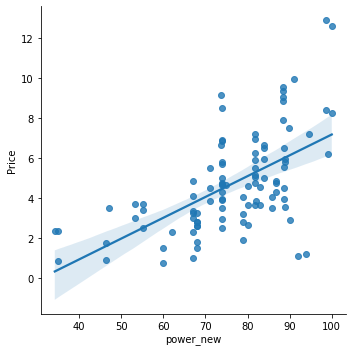

In [33]:
sn.lmplot( data = cars_df.sample(100),
           x = 'power_new',
           y = 'Price');

In [34]:
from sklearn.linear_model import LinearRegression

In [35]:
lreg_v1 = Pipeline(steps=[('preprocessor', preprocessor),
                          ('regressor', LinearRegression())])

In [36]:
lreg_v1.fit(X_train, y_train)

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('cat',
                                                  OneHotEncoder(handle_unknown='ignore'),
                                                  ['Fuel_Type', 'Transmission',
                                                   'Owner_Type', 'make',
                                                   'Location'])])),
                ('regressor', LinearRegression())])

In [37]:
final_feature_names = lreg_v1['preprocessor'].get_feature_names()

### Understanding model parameters

In [38]:
lreg_v1['regressor'].intercept_

1.1401420555276136

In [39]:
lreg_v1['regressor'].coef_

array([ 4.98688190e-01, -4.98688190e-01,  1.24627161e-01, -1.24627161e-01,
        1.49318988e-01, -4.90114061e-01, -7.77504232e-03,  3.48570115e-01,
       -6.83143502e-01, -8.76919847e-01, -6.39617940e-01, -2.19120347e-02,
       -5.49070755e-03,  2.08279675e-01, -6.69617929e-01,  7.21181490e-01,
        1.34235493e+00, -5.32513444e-02,  1.53682094e-01,  7.16399904e-02,
       -8.21719401e-01,  1.09746304e+00,  1.77071485e-01, -6.66843929e-02,
        4.18189623e-01,  9.05320190e-02,  8.41383561e-01, -4.90271899e-01,
        4.45717586e-01, -8.96474779e-02,  2.67309548e-01, -1.07632530e+00,
       -2.44021401e-01, -9.61818643e-02, -1.07838943e-02, -3.37985779e-01,
        1.78722268e-01, -2.58392528e-02,  1.10238869e-03,  4.87353179e-02])

In [40]:
dict(zip(final_feature_names, np.round(lreg_v1['regressor'].coef_, 2)))

{'cat__x0_Diesel': 0.5,
 'cat__x0_Petrol': -0.5,
 'cat__x1_Automatic': 0.12,
 'cat__x1_Manual': -0.12,
 'cat__x2_First': 0.15,
 'cat__x2_Fourth & Above': -0.49,
 'cat__x2_Second': -0.01,
 'cat__x2_Third': 0.35,
 'cat__x3_chevrolet': -0.68,
 'cat__x3_datsun': -0.88,
 'cat__x3_fiat': -0.64,
 'cat__x3_ford': -0.02,
 'cat__x3_honda': -0.01,
 'cat__x3_hyundai': 0.21,
 'cat__x3_mahindra': -0.67,
 'cat__x3_maruti': 0.72,
 'cat__x3_mitsubishi': 1.34,
 'cat__x3_nissan': -0.05,
 'cat__x3_renault': 0.15,
 'cat__x3_skoda': 0.07,
 'cat__x3_tata': -0.82,
 'cat__x3_toyota': 1.1,
 'cat__x3_volkswagen': 0.18,
 'cat__x4_Ahmedabad': -0.07,
 'cat__x4_Bangalore': 0.42,
 'cat__x4_Chennai': 0.09,
 'cat__x4_Coimbatore': 0.84,
 'cat__x4_Delhi': -0.49,
 'cat__x4_Hyderabad': 0.45,
 'cat__x4_Jaipur': -0.09,
 'cat__x4_Kochi': 0.27,
 'cat__x4_Kolkata': -1.08,
 'cat__x4_Mumbai': -0.24,
 'cat__x4_Pune': -0.1,
 'KM_Driven': -0.01,
 'age': -0.34,
 'Seats': 0.18,
 'mileage_new': -0.03,
 'engine_new': 0.0,
 'power_new': 

### Predict on test set

In [41]:
y_pred = lreg_v1.predict(X_test)

In [42]:
y_df = pd.DataFrame({"actual": y_test,
                     "predicted": y_pred,
                     "residual": y_pred - y_test})

In [43]:
y_df.sample(10, random_state = 100)

,actual,predicted,residual
770,7.23,6.140619,-1.089381
1540,6.43,5.415039,-1.014961
2962,6.25,5.942801,-0.307199
2040,4.69,5.412764,0.722764
640,2.65,2.718549,0.068549
81,8.35,6.461743,-1.888257
2773,6.75,5.823360,-0.926640
816,3.00,4.077798,1.077798
305,1.96,1.310980,-0.649020
2907,4.00,4.425299,0.425299


### Measuring Accuracy

In [44]:
from sklearn.metrics import mean_squared_error, r2_score

In [45]:
mse_v1 = mean_squared_error(y_test, y_pred)

In [46]:
mse_v1

0.9756488695977443

In [47]:
rmse_v1 = np.sqrt(mse_v1)

In [48]:
rmse_v1

0.9877493961515463

In [49]:
r2_score(y_test, y_pred)

0.7855630825732653

### What are the reasons for the remaining error

1. More factors 
2. More samples 
3. Complex Models : Try other models
4. Feature Engineering - Derive new features (factors) from existing features (factors)
5. Noise (randomness)
   

### Error Analysis

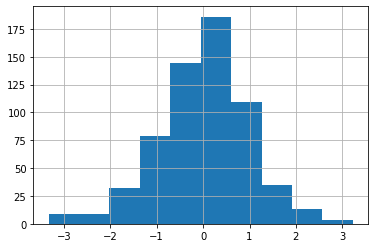

In [50]:
y_df.residual.hist();

In [51]:
y_df

,actual,predicted,residual
1324,5.91,5.821262,-0.088738
328,3.95,5.778714,1.828714
1361,10.34,8.235092,-2.104908
1657,1.20,1.679362,0.479362
1786,1.55,1.881246,0.331246
...,...,...,...
112,2.65,1.985685,-0.664315
2893,5.65,5.972072,0.322072
2093,2.25,2.660128,0.410128
2038,6.10,7.260181,1.160181


In [52]:
test_cars_df = y_df.join(X_test)

In [53]:
test_cars_df[test_cars_df.residual > 2.0].sort_values('residual', ascending = False)

,actual,predicted,residual,KM_Driven,Fuel_Type,age,Transmission,Owner_Type,Seats,make,mileage_new,engine_new,power_new,Location
1595,1.85,5.079117,3.229117,91,Diesel,9,Manual,First,7.0,mahindra,14.95,2489.0,93.70,Ahmedabad
2687,1.60,4.533446,2.933446,49,Diesel,2,Manual,Second,5.0,tata,25.00,1396.0,69.00,Pune
2280,1.80,4.560153,2.760153,80,Diesel,3,Manual,First,5.0,tata,25.00,1396.0,69.00,Hyderabad
367,2.20,4.635640,2.435640,73,Diesel,3,Manual,First,5.0,tata,25.00,1396.0,69.00,Hyderabad
524,4.55,6.932150,2.382150,95,Diesel,2,Manual,Second,5.0,ford,25.83,1498.0,99.00,Hyderabad
630,2.95,5.247569,2.297569,90,Petrol,4,Manual,First,7.0,maruti,15.10,1196.0,73.00,Hyderabad
1522,3.65,5.916576,2.266576,12,Petrol,3,Manual,First,5.0,maruti,18.50,1197.0,85.80,Mumbai
2150,4.44,6.695067,2.255067,22,Petrol,2,Manual,First,5.0,maruti,15.10,1196.0,73.00,Coimbatore
3087,4.83,7.076238,2.246238,70,Diesel,4,Manual,First,5.0,honda,25.80,1498.0,98.60,Coimbatore
1878,4.30,6.498848,2.198848,42,Petrol,3,Manual,First,7.0,maruti,15.10,1196.0,73.00,Coimbatore


In [54]:
test_cars_df[test_cars_df.residual < -2.0].sort_values('residual', ascending = False)

,actual,predicted,residual,KM_Driven,Fuel_Type,age,Transmission,Owner_Type,Seats,make,mileage_new,engine_new,power_new,Location
551,9.23,7.229253,-2.000747,72,Diesel,5,Manual,First,5.0,toyota,21.43,1364.0,87.20,Coimbatore
1376,9.51,7.473816,-2.036184,13,Petrol,0,Automatic,First,5.0,maruti,21.40,1197.0,83.10,Kochi
2281,0.99,-1.055105,-2.045105,42,Petrol,12,Manual,First,5.0,chevrolet,18.00,995.0,62.00,Kolkata
1361,10.34,8.235092,-2.104908,25,Diesel,2,Manual,First,5.0,maruti,24.30,1248.0,88.50,Coimbatore
203,9.89,7.720688,-2.169312,12,Petrol,1,Automatic,First,5.0,maruti,21.40,1197.0,83.10,Coimbatore
1969,11.00,8.540727,-2.459273,28,Diesel,1,Manual,First,5.0,maruti,24.30,1248.0,88.50,Coimbatore
2632,0.70,-1.786311,-2.486311,90,Petrol,19,Manual,Second,5.0,maruti,17.30,993.0,60.00,Jaipur
973,9.96,7.466223,-2.493777,15,Petrol,1,Manual,First,5.0,maruti,20.73,1373.0,91.10,Kochi
2952,9.75,7.196717,-2.553283,53,Diesel,3,Manual,First,5.0,honda,26.00,1498.0,98.60,Hyderabad
304,9.75,7.087508,-2.662492,36,Diesel,2,Manual,First,5.0,maruti,28.09,1248.0,88.50,Jaipur


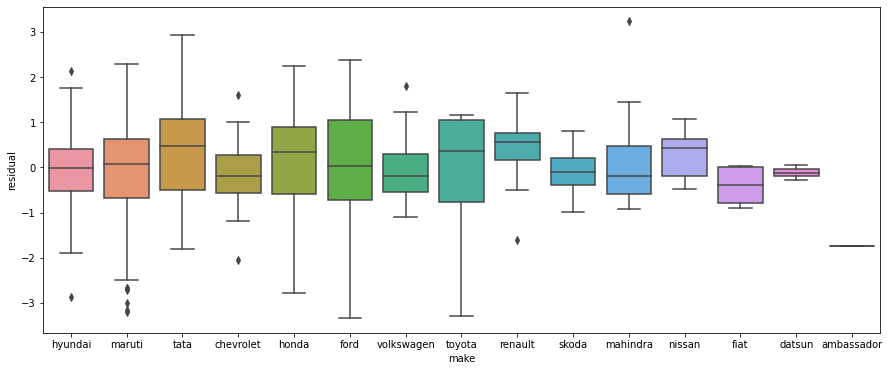

In [55]:
plt.figure(figsize=(15, 6))
sn.boxplot(data = test_cars_df, x = 'make', y = 'residual');

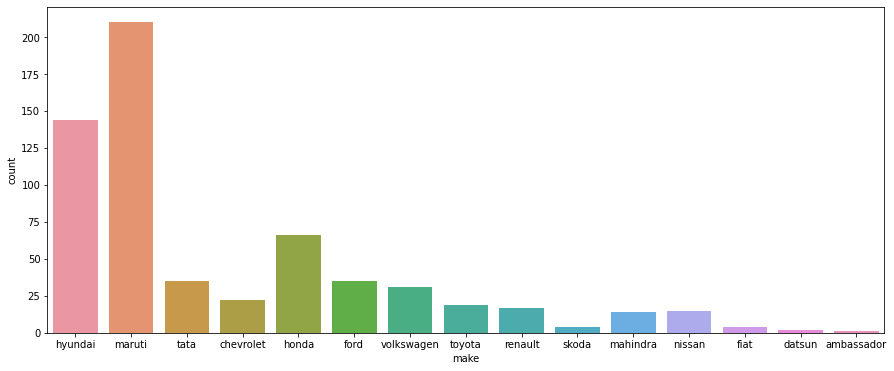

In [56]:
plt.figure(figsize=(15, 6))
sn.countplot(data = test_cars_df, x = 'make');

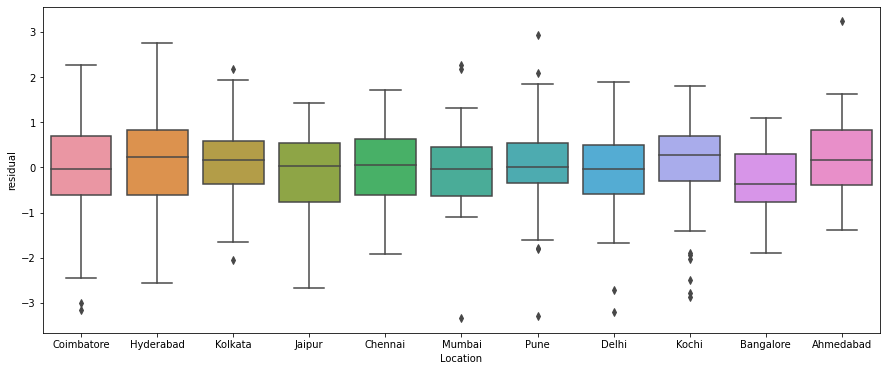

In [57]:
plt.figure(figsize=(15, 6))
sn.boxplot(data = test_cars_df, x = 'Location', y = 'residual');

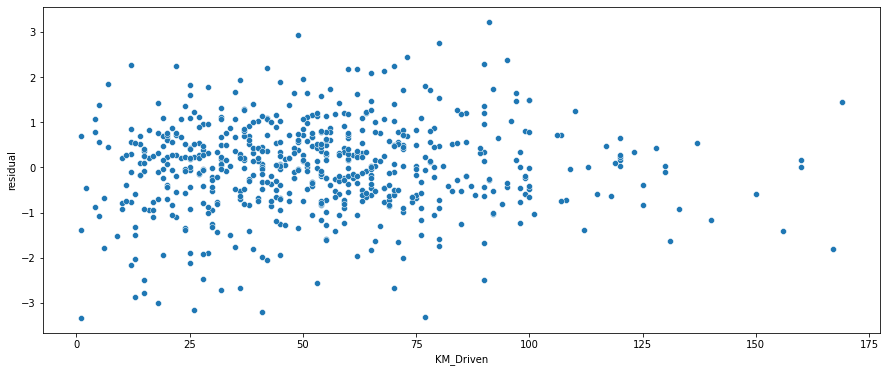

In [58]:
plt.figure(figsize=(15, 6))
sn.scatterplot(data = test_cars_df, x = 'KM_Driven', y = 'residual');

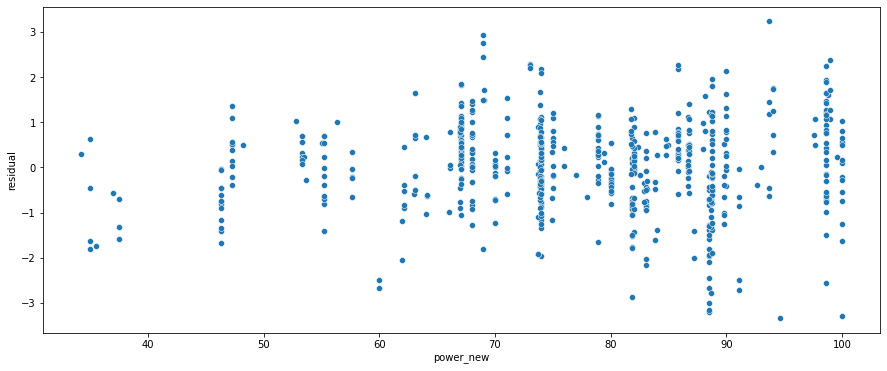

In [59]:
plt.figure(figsize=(15, 6))
sn.scatterplot(data = test_cars_df, x = 'power_new', y = 'residual');

In [60]:
test_cars_df['km_power'] = test_cars_df['KM_Driven'] /  test_cars_df['power_new'] 

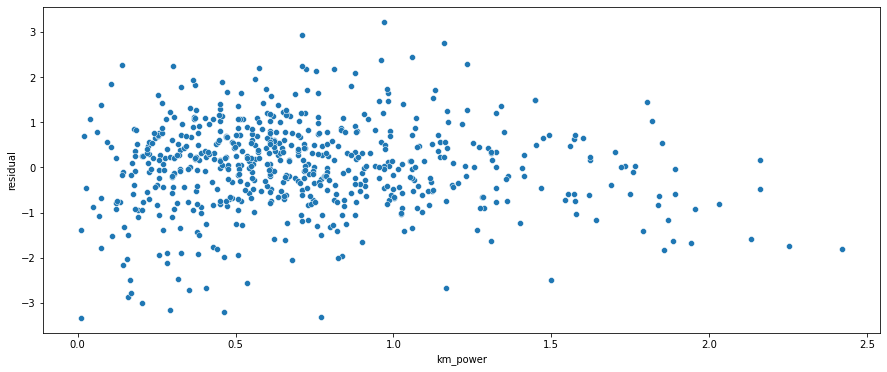

In [61]:
plt.figure(figsize=(15, 6))
sn.scatterplot(data = test_cars_df, x = 'km_power', y = 'residual');

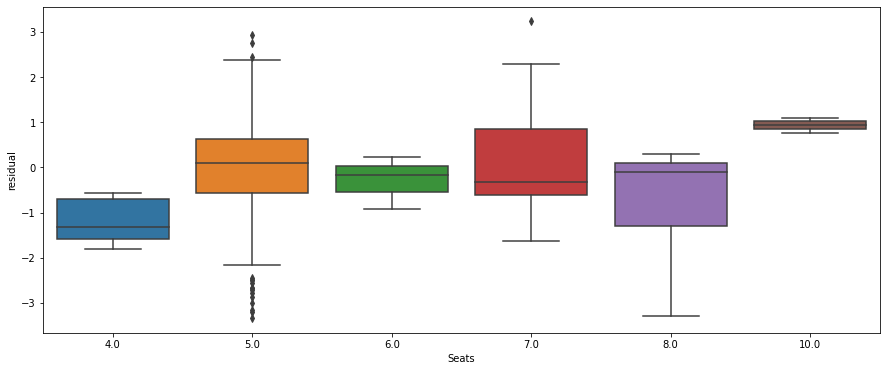

In [62]:
plt.figure(figsize=(15, 6))
sn.boxplot(data = test_cars_df, x = 'Seats', y = 'residual');

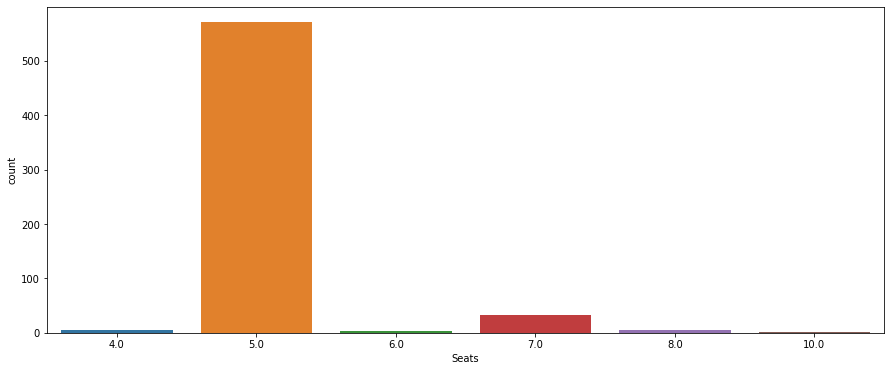

In [63]:
plt.figure(figsize=(15, 6))
sn.countplot(data = test_cars_df, x = 'Seats');

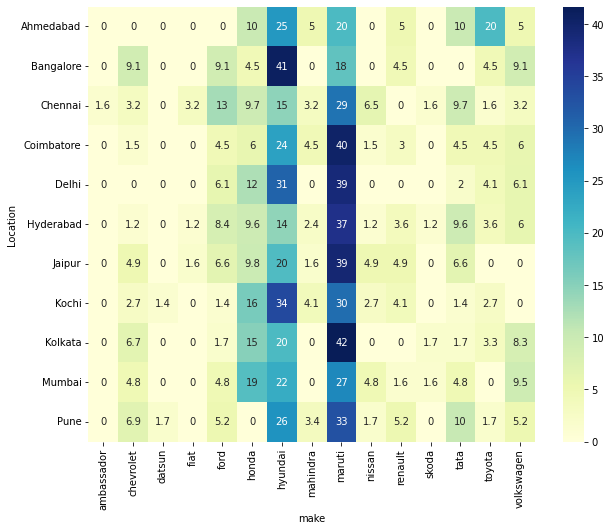

In [64]:
make_ct = pd.crosstab(test_cars_df.Location,
                        test_cars_df.make,
                        normalize = 'index') * 100

plt.figure(figsize=(10, 8))
sn.heatmap(make_ct, annot=True, cmap="YlGnBu");

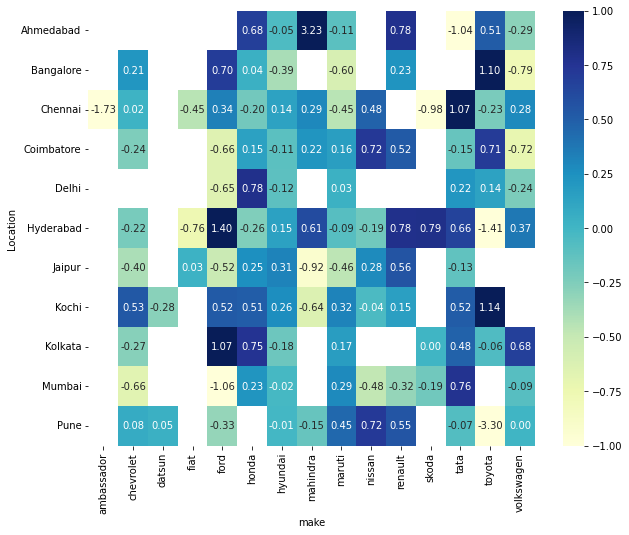

In [65]:
make_mean = pd.crosstab(test_cars_df.Location,
                        test_cars_df.make,
                        values = test_cars_df.residual,
                        aggfunc = 'median')

plt.figure(figsize=(10, 8))
sn.heatmap(make_mean, 
           annot=True, 
           cmap="YlGnBu",
           vmax = 1.0,
           vmin = -1.0,
           fmt='1.2f');

### Saving the model

In [66]:
class CarPredictionModel():
    
    def __init__(self, model, features, rmse):
        self.model = model
        self.features = features
        self.rmse = rmse


In [67]:
my_model = CarPredictionModel(lreg_v1, list(X_train.columns), rmse_v1)

In [68]:
# Uncomment this code for older version of sklearn
#from sklearn.externals import joblib
#joblib.dump(my_model, './cars.pkl')

In [69]:
from joblib import dump

In [70]:
dump(my_model, './cars.pkl')

['./cars.pkl']